In [ ]:
# DNN 練習用 mnist

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# keras ライブラリの読み込み
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


11493376/11490434 [==============================] - 9s 1us/step


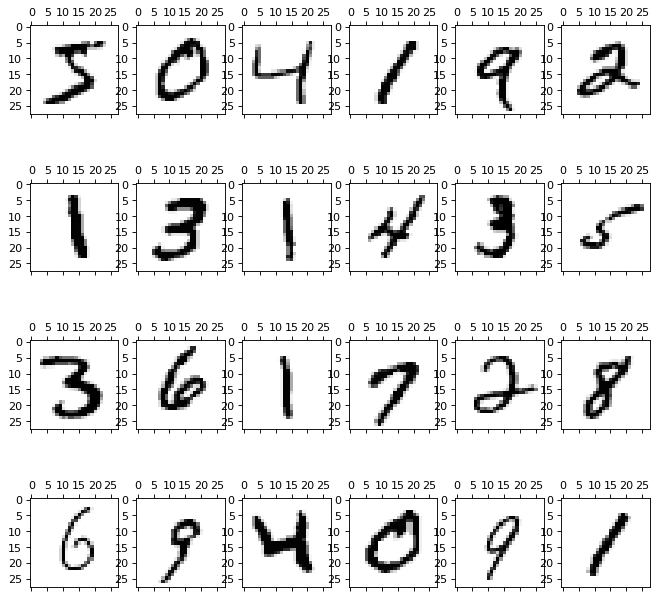

In [3]:
# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 叩き台 plot
plot_num = 1;  # 表示する番号
plot_sum1 = 4;  # 表示する個数 縦軸
plot_sum2 = 6;  # 表示する個数 横軸

fig = plt.figure(figsize=(10, 10), dpi=80)
for i1 in range(plot_sum1):
    for i2 in range(plot_sum2):
        ax1 = fig.add_subplot(plot_sum1, plot_sum2, i1*plot_sum2+i2+1)
        ax1.matshow(X_train[i1*plot_sum2+i2], cmap="Greys")
# plt.savefig('fig/fig_sample_digits.jpg')
# fig.subplots_adjust(wspace=0.4, hspace=0.01)
plt.show()

In [33]:
# MNISTのデータをpngで書き込み
i=0
cv2.imwrite('mypng/digit_'+str(y_train[i])+'_3.png', X_train[i])


True

In [66]:
## MLP
img_size=28
# MNISTのデータを読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを28*28=784の一次元配列に変換
X_train = X_train.reshape(-1, img_size^2).astype('float32') / 255
X_test = X_test.reshape(-1, img_size^2).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
if y_train.ndim == 1:
    y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
if y_test.ndim == 1:
    y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

In [72]:
## MLP
# 入力・出力
in_size = img_size^2
out_size = 10
# MLP モデル定義
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
model.add(Dropout(0.2)) # 過学習を防ぐ
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(out_size, activation='softmax'))
# MLP モデル構築
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [73]:
## MLP
# 学習
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 162us/step - loss: 0.8617 - acc: 0.7355 - val_loss: 0.4001 - val_acc: 0.8793
Epoch 2/50
60000/60000 [==============================] - 10s 160us/step - loss: 0.3640 - acc: 0.8915 - val_loss: 0.2948 - val_acc: 0.9101
Epoch 3/50
60000/60000 [==============================] - 9s 158us/step - loss: 0.2798 - acc: 0.9163 - val_loss: 0.2306 - val_acc: 0.9310
Epoch 4/50
60000/60000 [==============================] - 11s 189us/step - loss: 0.2232 - acc: 0.9331 - val_loss: 0.1881 - val_acc: 0.9413
Epoch 5/50
60000/60000 [==============================] - 12s 192us/step - loss: 0.1834 - acc: 0.9448 - val_loss: 0.1579 - val_acc: 0.9514
Epoch 6/50
60000/60000 [==============================] - 10s 163us/step - loss: 0.1585 - acc: 0.9522 - val_loss: 0.1372 - val_acc: 0.9582
Epoch 7/50
60000/60000 [==============================] - 10s 172us/step - loss: 0.1361 - acc: 0.9587 - val_loss: 0.1

In [74]:
## MLP
# 評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

10000/10000 [==============================] - 1s 102us/step
('\xe6\xad\xa3\xe8\xa7\xa3\xe7\x8e\x87=', 0.98260000000000003, 'loss=', 0.083486937235806274)


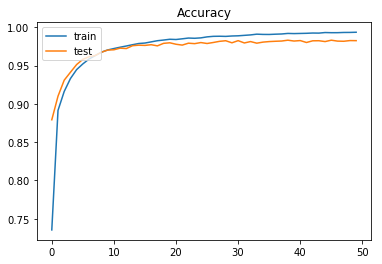

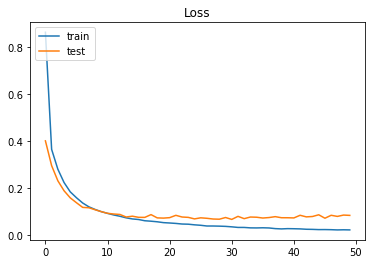

In [76]:
## MLP
# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [78]:
## MLP
# 保存
model.save_weights("ld/mnist_mlp190213.h5")
# 読み込み
model.load_weights("ld/mnist_mlp190213.h5")

In [ ]:
## CNN 
# https://qiita.com/icoxfog417/items/5fd55fad152231d706c2
# https://deepage.net/deep_learning/2016/11/07/convolutional_neural_network.html

In [4]:
## CNN 
img_size=28
# MNISTのデータを読み込み 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# データを(1, 28, 28)の三次元配列に変換
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1).astype('float32') / 255
# ラベルデータをone-hotベクトルに直す
if y_train.ndim == 1:
    y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
if y_test.ndim == 1:
    y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)

In [6]:
## CNN
# 入力・出力
in_shape = (img_size, img_size, 1)
out_size = 10
# CNN モデル定義
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))
# CNN モデル構築
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [7]:
## CNN
# 学習
hist = model.fit(X_train, y_train,
          batch_size=128, 
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 176s 3ms/step - loss: 0.2107 - acc: 0.9367 - val_loss: 0.0637 - val_acc: 0.9791
Epoch 2/12
60000/60000 [==============================] - 544s 9ms/step - loss: 0.0766 - acc: 0.9776 - val_loss: 0.0434 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 342s 6ms/step - loss: 0.0621 - acc: 0.9816 - val_loss: 0.0323 - val_acc: 0.9893
Epoch 4/12
60000/60000 [==============================] - 1130s 19ms/step - loss: 0.0517 - acc: 0.9851 - val_loss: 0.0333 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 2486s 41ms/step - loss: 0.0447 - acc: 0.9867 - val_loss: 0.0338 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0441 - acc: 0.9871 - val_loss: 0.0312 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0437 - acc: 0.9876 - val_loss: 0.032

In [8]:
## CNN
# 評価
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

10000/10000 [==============================] - 9s 936us/step
('\xe6\xad\xa3\xe8\xa7\xa3\xe7\x8e\x87=', 0.9926, 'loss=', 0.029555248741028665)


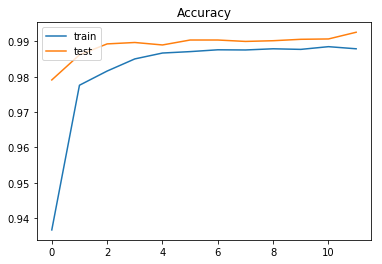

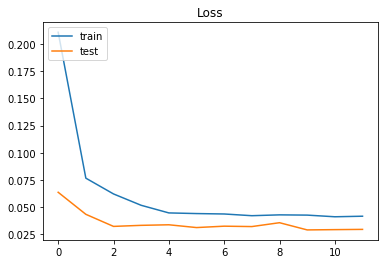

In [9]:
## CNN
# 学習の様子をグラフへ描画
# 正解率の推移をプロット
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# ロスの推移をプロット
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
## CNN
# 保存
model.save_weights("ld/mnist_cnn190213.h5")
# 読み込み
model.load_weights("ld/mnist_cnn190213.h5")

In [65]:
fn="mypng/digit_5_3.png"
img_size=28
my_img = cv2.imread(fn)
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)

In [67]:
my_img.min()

0

/anaconda/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


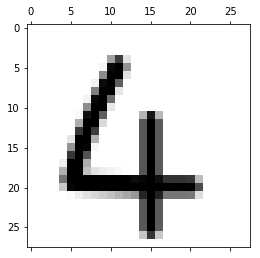

1/1 [==============================] - 0s 27ms/step
4


In [1]:
## 画像判定

fn="mypng/digit_4_1.png"
img_size=28

import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop

# img 読み込み
my_img = cv2.imread(fn)
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
my_img = cv2.resize(my_img, (img_size, img_size),interpolation = cv2.INTER_AREA)
# interpolation = cv2.INTER_AREA 平均
my_img = 255 - my_img # 白黒反転する
plt.matshow(my_img,cmap="Greys")
plt.show()
# データを(28,28,1)の三次元配列に変換
my_img = my_img.reshape(1,img_size, img_size, 1).astype('float32') / 255

# CNN モデル定義
# 入力・出力
in_shape = (img_size, img_size, 1)
out_size = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))
# CNN モデル構築
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
# model 読み込み
model.load_weights("ld/mnist_cnn190213.h5")

# 判定
res = model.predict(my_img,batch_size=128,verbose=1)
print(res[0].argmax())

# 

1/1 [==============================] - 0s 906us/step


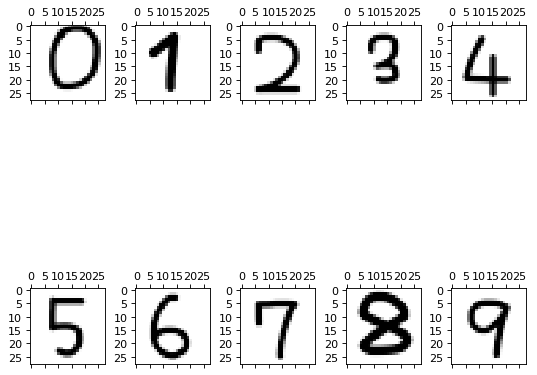

判定結果= [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [6]:
## 画像判定
# 試し書きの0~9全部入れる

img_size=28

import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop

# CNN モデル定義
# 入力・出力
in_shape = (img_size, img_size, 1)
out_size = 10
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))
# CNN モデル構築
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])
# model 読み込み
model.load_weights("ld/mnist_cnn190213.h5")

# img 読み込み
fig = plt.figure(figsize=(8, 8), dpi=80)
ans=np.zeros(10)
# 自作の0~9入れて判定
for a1 in range(10):
    fn="mypng/digit_"+str(a1)+"_1.png"
    my_img = cv2.imread(fn)
    my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img, (img_size, img_size),interpolation = cv2.INTER_AREA)
    # interpolation = cv2.INTER_AREA 平均
    my_img = 255 - my_img # 白黒反転する
    ax1 = fig.add_subplot(2, 5, a1+1)
    ax1.matshow(my_img,cmap="Greys")
    # データを(28,28,1)の三次元配列に変換
    my_img = my_img.reshape(1,img_size, img_size, 1).astype('float32') / 255

    # 判定
    res = model.predict(my_img,batch_size=128,verbose=1)
    ans[a1]=res[0].argmax()
    # 判定確率残すべき...
plt.subplots_adjust(wspace=0.4,hspace=0.2)
plt.show()
print('判定結果=',ans)

# 